In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as spi
import numpy as np
import math
from scipy.interpolate import lagrange

In [29]:
ans = pd.read_csv("anscombe.csv")
ans

,group,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


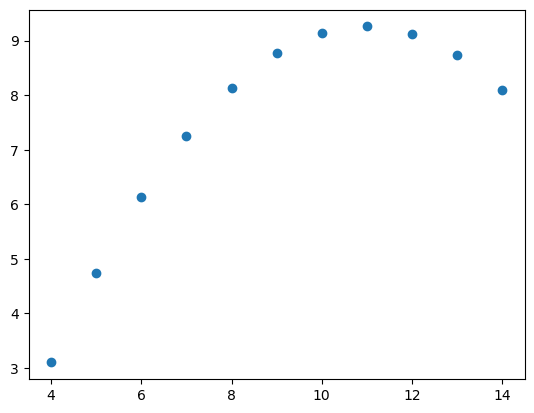

In [30]:
plt.plot(ans[ans.group == "II"].x,ans[ans.group == "II"].y,'o')

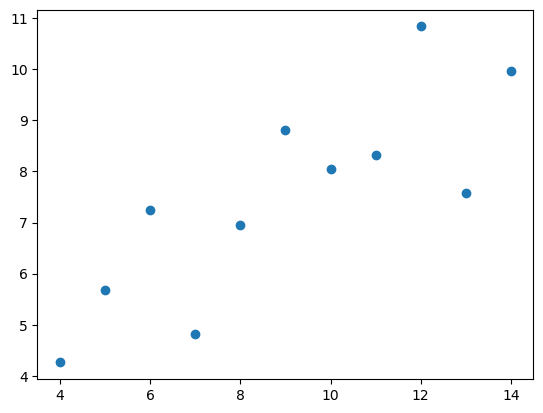

In [31]:
plt.plot(ans[ans.group == "I"].x,ans[ans.group == "I"].y,'o')

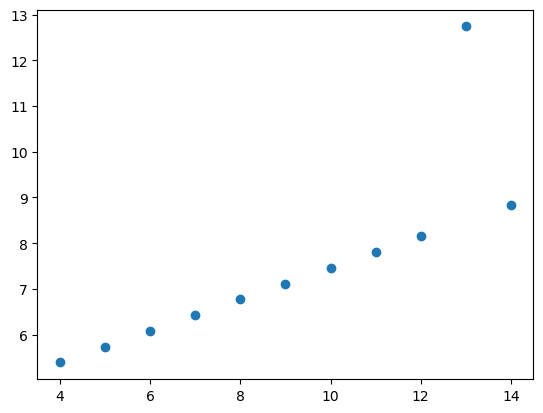

In [32]:
plt.plot(ans[ans.group == "III"].x,ans[ans.group == "III"].y,'o')

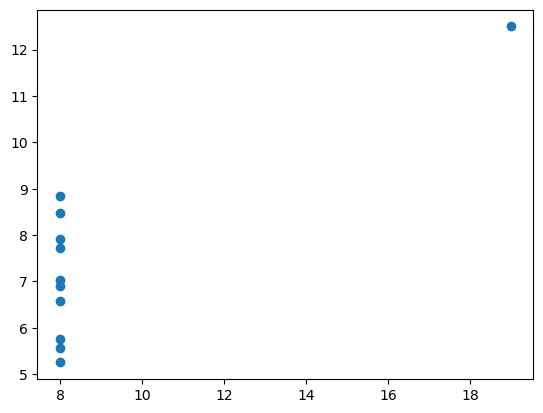

In [33]:
plt.plot(ans[ans.group == "IV"].x,ans[ans.group == "IV"].y,'o')

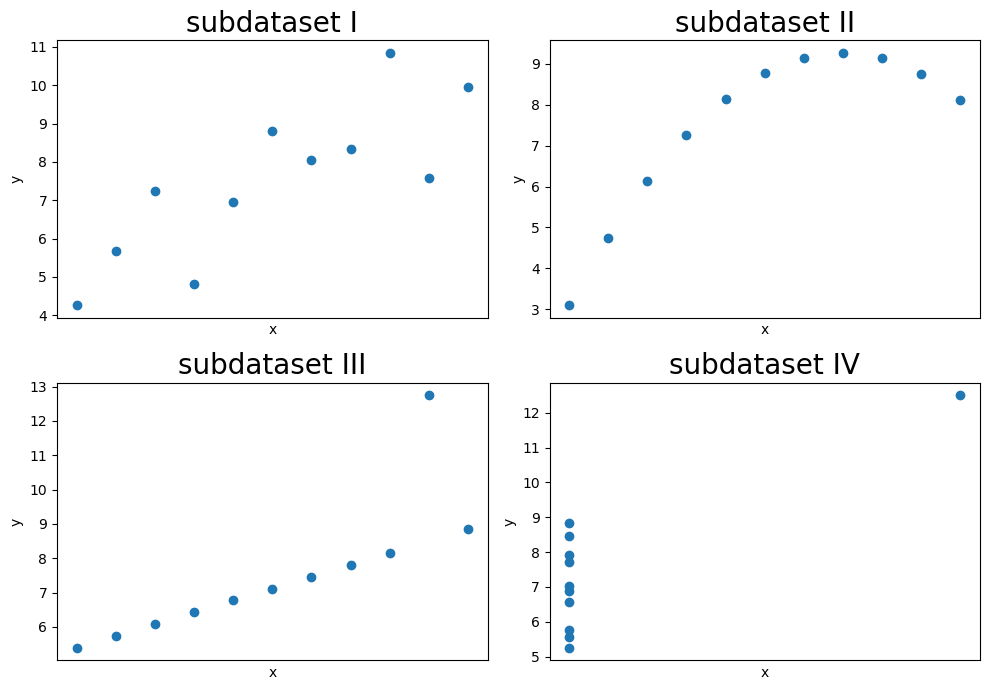

In [34]:

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Iterate over each group and plot on respective subplot
for i, group in enumerate(["I", "II", "III", "IV"]):
    x = ans[ans.group == group]["x"].values
    y = ans[ans.group == group]["y"].values
    x = x - x.mean()
    ax = axes[i // 2, i % 2]
    ax.scatter(x, y)
    ax.set_title(f"subdataset {group}", fontsize=20)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xticks([])  # Hide x ticks

plt.tight_layout()
plt.show()


In [35]:
# TODO: complete this function to compute Root Mean Squared Error 
def RMSE(y_actual, y_predicted):
    
    squaredDifference = (y_actual - y_predicted) ** 2   #squared differences between actual and predicted values
    MSE = np.mean(squaredDifference)                   #mean of squared differences
    return math.sqrt(MSE)

In [36]:
ans = pd.read_csv('anscombe.csv')
x = np.sort(ans[ans.group == 'II']['x'].values)
y= np.sort(ans[ans.group == 'II']['y'].values)

In [37]:
x           #original x values from subdataset II

array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.])

In [38]:
y           #original y values from subdataset II

array([3.1 , 4.74, 6.13, 7.26, 8.1 , 8.14, 8.74, 8.77, 9.13, 9.14, 9.26])

In [39]:
#Give subset of Data in Assignment
x1 = np.array([8, 9, 10, 11, 12, 13])
y1 = np.array([8.1, 8.14, 8.74, 8.77, 9.13, 9.14])

# Polynomial made of degree = 3
coeffs = np.polyfit(x1, y1, 3)             #contains coefficients now
polynomialFunc = np.poly1d(coeffs)         #uses coefficeints to generate Polynomial Function

#Now it can be used to predict polynomial at any x value.
y_poly = polynomialFunc(x)

# Lagrange interpolation
lagrange_func = lagrange(x1, y1)
y_lag = lagrange_func(x)

# Approxmimation via interpolation 

In [40]:
# RMSE 
rmse_lag = RMSE(y, y_lag)
rmse_lag

100.40959022467709

# Approximation via Least square

In [41]:
# RMSE 
rmse_poly = RMSE(y, y_poly)
rmse_poly

2.7165657161323735

# Comparison and conlusion

In [42]:
print("Comparison:")
print("The error from # Approxmimation via interpolation is much larger than Approximation via Least square")

Comparison:
The error from # Approxmimation via interpolation is much larger than Approximation via Least square


In [47]:
print("Cocnlusion:")
print("As Lagrange Interpolation is designed to pass exactly through all data points, it can result in a poorer approximation over larger range of data")

Cocnlusion:
As Lagrange Interpolation is designed to pass exactly through all data points, it can result in a poorer approximation over larger range of data
